In [1]:
import numpy as np
import random

## import Matpolt with PyQt4 Backend
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Parameters
learning_rate = 0.001
training_epochs = 2500
display_step = 50

In [3]:
# Training Data
train_X = np.asarray([3.3, 4.4, 5.5, 6.71 ,6.93,
                         4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654,
                         9.27, 3.1, 12.21, 6.12, 8.24])
train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694,
                         1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42,
                         2.94, 1.3, 3.2, 1.6, 1.8])
n_samples = train_X.shape[0]

print(train_X.shape)
print(train_Y.shape)

(20,)
(20,)


In [4]:
W = np.random.randn()

In [5]:
def construct_model(X, Y, W):
    loss = L2_loss(predict_Y(X, W), Y)
    return loss

def predict_Y(X, W):
    return np.dot(X, W)

def L2_loss(pred, Y):
    return (pred - Y)**2 / (2*n_samples)
    
def get_loss(X, Y, W):
    loss = 0
    for (x,y) in zip(X,Y):
        loss += L2_loss(predict_Y(x, W), y)
    return loss
    
def gradient_descent(X, W, loss, learning_rate):
    gradient = - np.dot(X.transpose(), loss) / n_samples
    W = W - (learning_rate * gradient)
    return W

In [6]:
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        loss = construct_model(x, y, W)
        W = gradient_descent(x, W, loss, learning_rate)

    if epoch % display_step == 0:
        loss = get_loss(train_X, train_Y, W)
        print("Epoch : ", epoch+1, "loss= ", loss)
        
print("Optimization Finished!!")

Epoch :  1 loss=  11.8350037938
Epoch :  51 loss=  6.55976448479
Epoch :  101 loss=  4.19977878434
Epoch :  151 loss=  2.94087814934
Epoch :  201 loss=  2.18939601024
Epoch :  251 loss=  1.70425479184
Epoch :  301 loss=  1.37242628693
Epoch :  351 loss=  1.13515270813
Epoch :  401 loss=  0.95940863689
Epoch :  451 loss=  0.825460021458
Epoch :  501 loss=  0.720918442101
Epoch :  551 loss=  0.637684111101
Epoch :  601 loss=  0.570277555953
Epoch :  651 loss=  0.514882829394
Epoch :  701 loss=  0.46877524783
Epoch :  751 loss=  0.429966563376
Epoch :  801 loss=  0.396977969598
Epoch :  851 loss=  0.368690855163
Epoch :  901 loss=  0.344246273118
Epoch :  951 loss=  0.322975750874
Epoch :  1001 loss=  0.304352743328
Epoch :  1051 loss=  0.28795797364
Epoch :  1101 loss=  0.273454297206
Epoch :  1151 loss=  0.260568210355
Epoch :  1201 loss=  0.249076069456
Epoch :  1251 loss=  0.238793698172
Epoch :  1301 loss=  0.229568464753
Epoch :  1351 loss=  0.221273182633
Epoch :  1401 loss=  0.213

In [9]:
pred_Y = []
for i in range(n_samples):
    pred_Y.append(predict_Y(train_X[i], W))

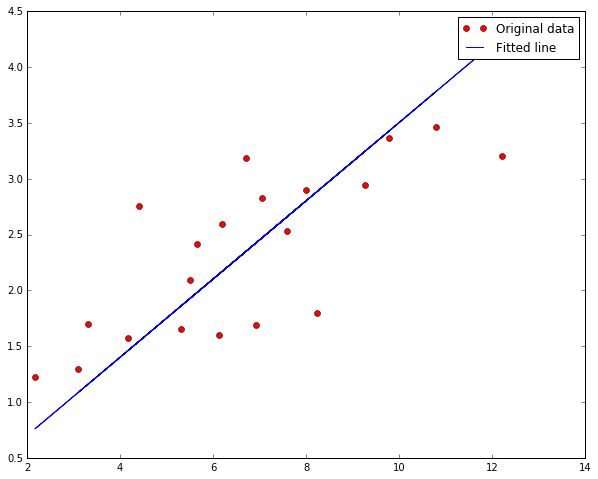

In [10]:
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, pred_Y, label='Fitted line')
plt.legend()
plt.show()